In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import missingno as msn

In [2]:
data = pd.read_csv("E:\Desktop\EDA Customer/CustomerChurn.csv")

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.shape

(7043, 21)

In [6]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: >

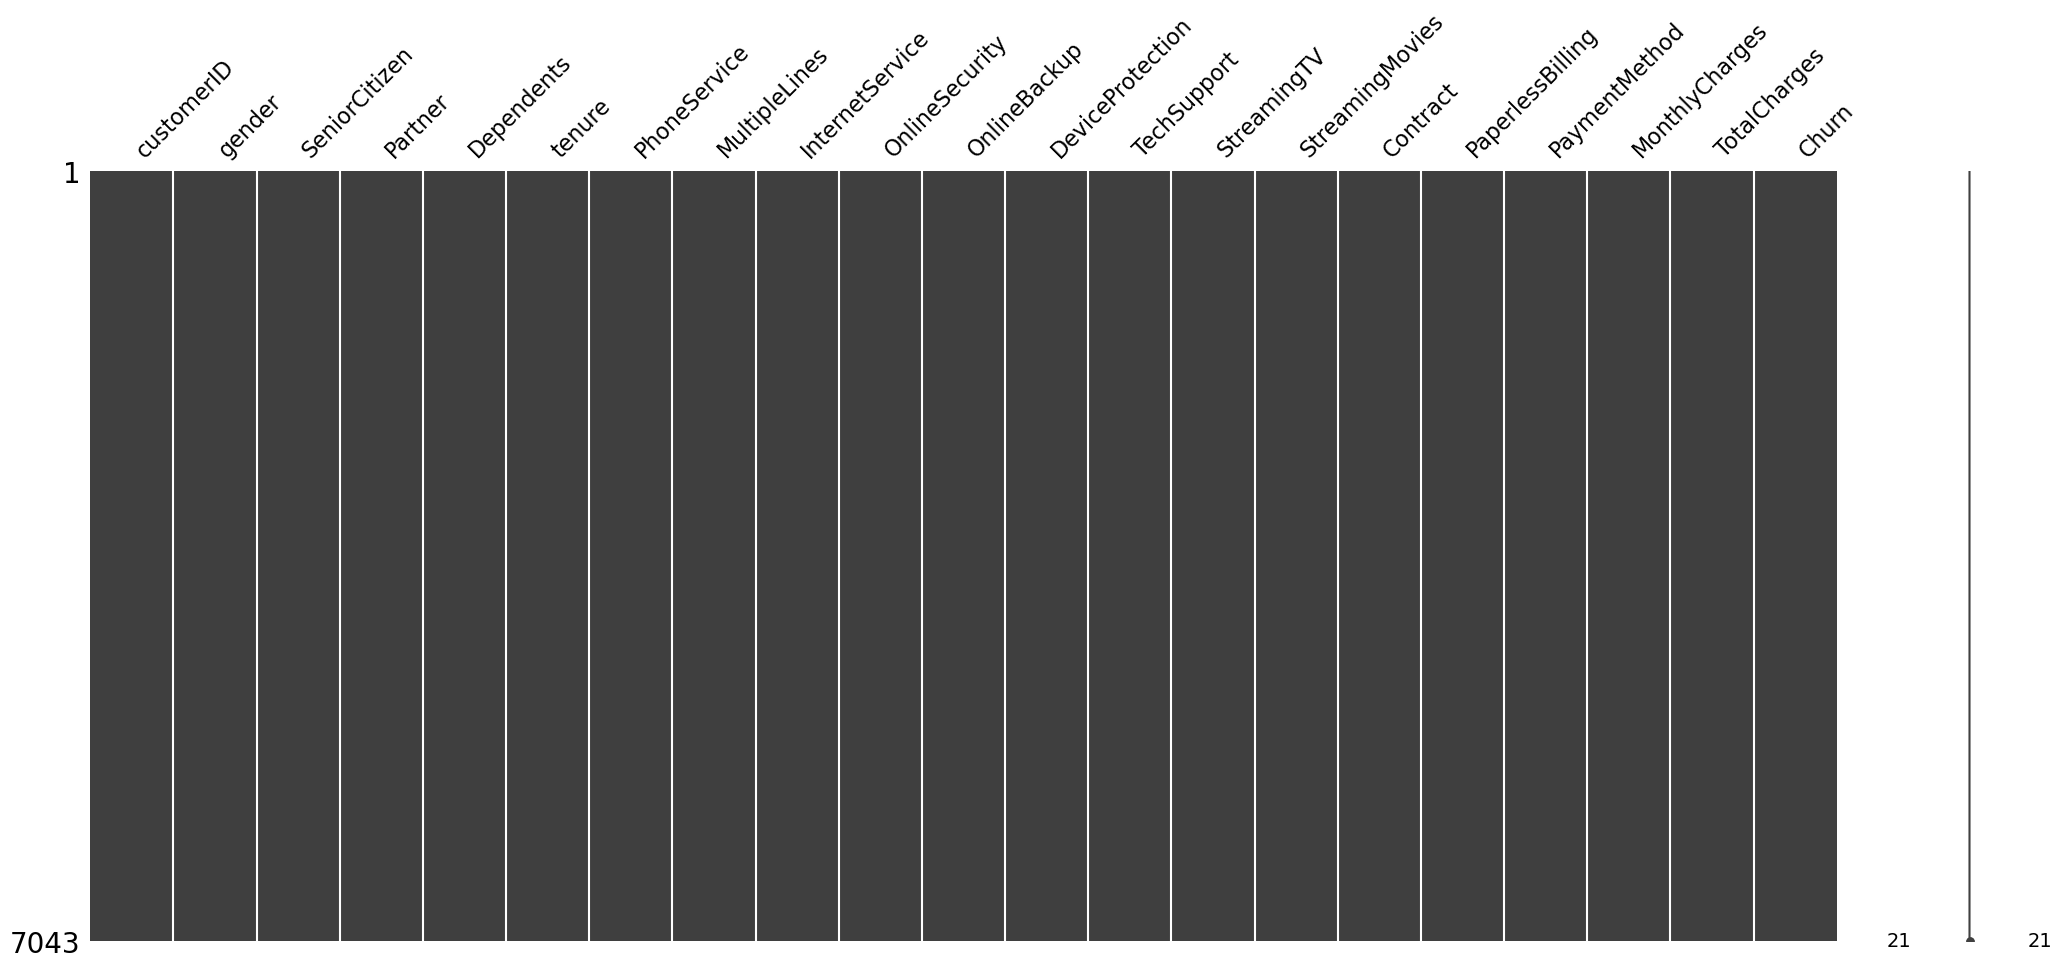

In [8]:
msn.matrix(data)

## Note: 

### There are no missing values and null values in the data set. So it is ready for further processing.

In [9]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


####  1.SeniorCitizen column is  categorical, hence the 25%-50%-75% distribution is not proper.
####  2.75% Customers have tenure less than 55 months.
####  3.Average monthly charges is 64 .76 whereas 25% Customers pay more than 89.85 per month.

In [10]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [12]:
percentage_of_churn = data['Churn'].value_counts()/len(data)*100
percentage_of_churn

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

#### Only 26.53% of Customers is churned.

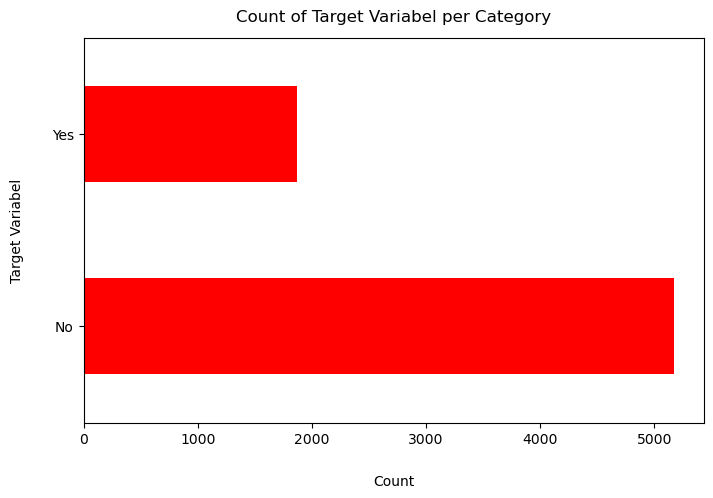

In [13]:
data['Churn'].value_counts().plot(kind="barh",color = "red", figsize =(8,5))
plt.xlabel("Count", labelpad= 20)
plt.ylabel("Target Variabel", labelpad= 20)
plt.title('Count of Target Variabel per Category',y =1.02)
plt.show()

## Data Cleaning

<b>1. Create a copy of base data for manupulation and processing 

In [14]:
df = data.copy()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<b>2. Total Charges Column values should be numeric amount. Let's convert it to numerical data type.

In [16]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<Axes: >

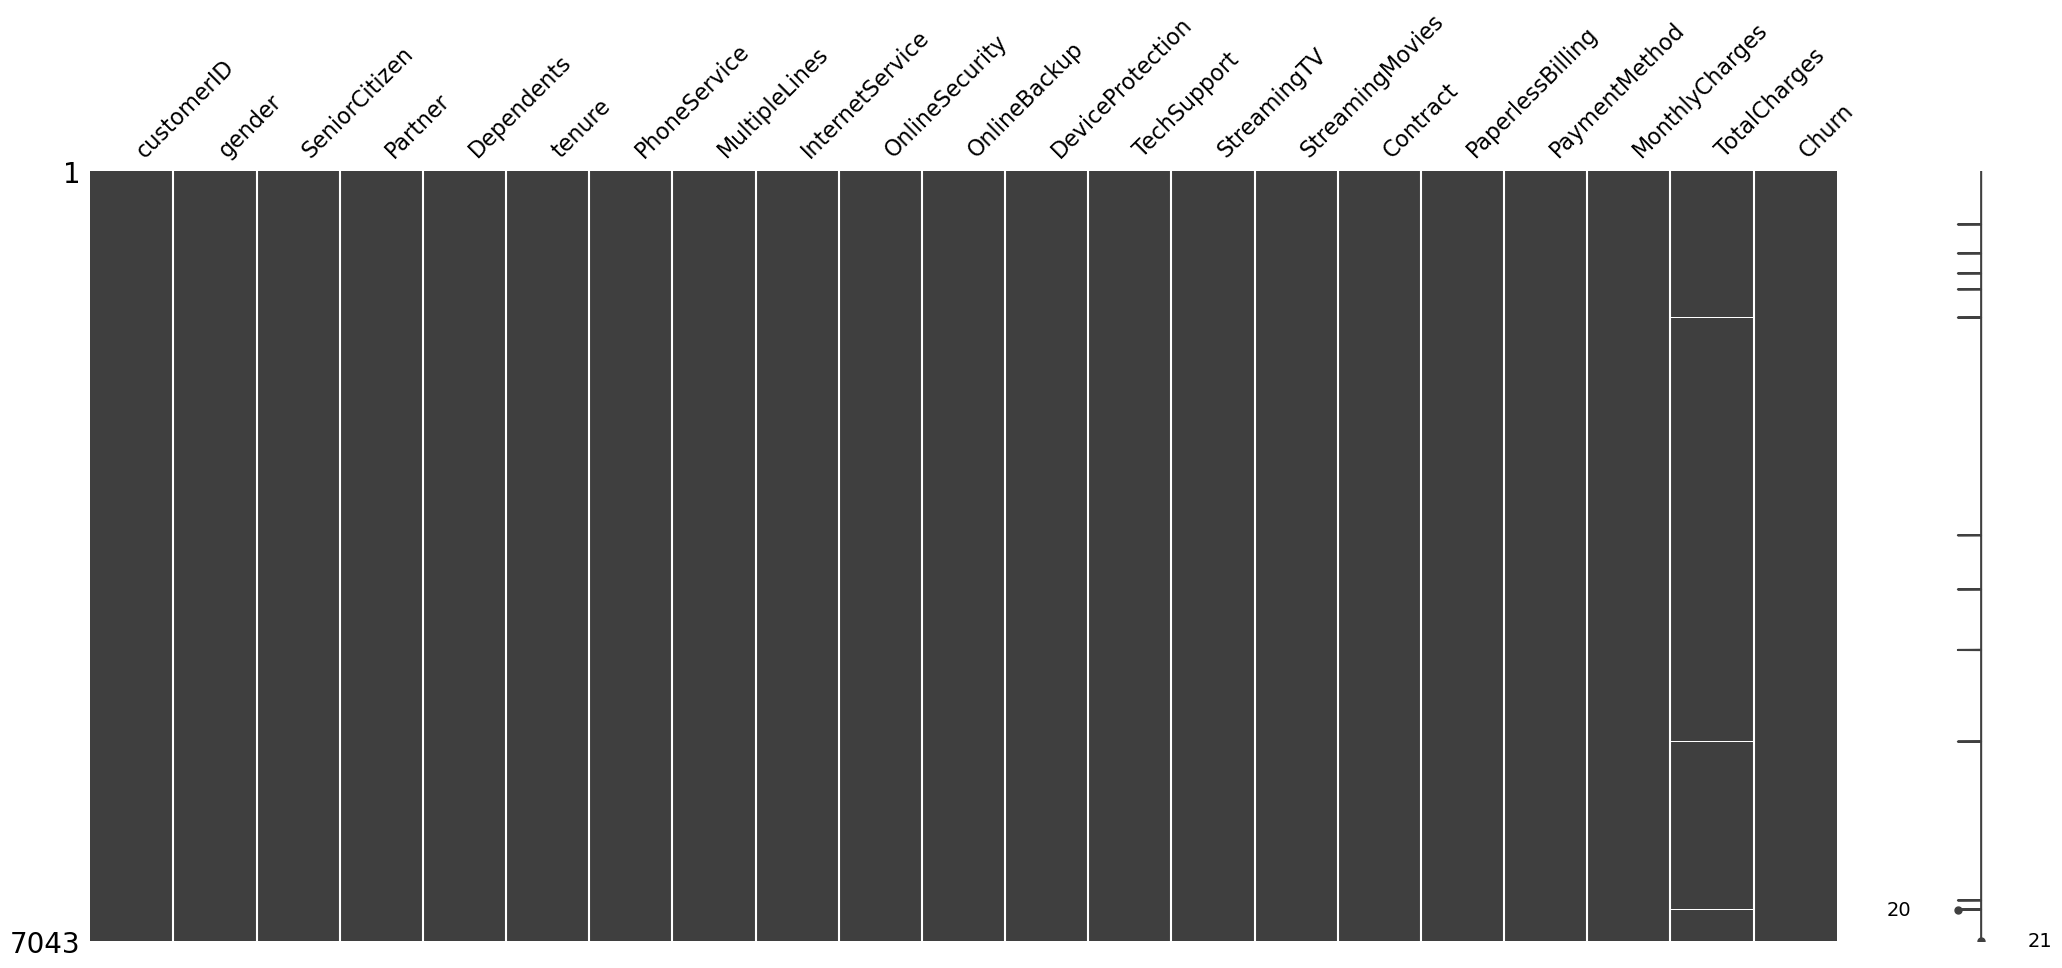

In [18]:
msn.matrix(df)

<b>3. There are  11 missing or null values in Total Charges Column.

In [19]:
df.loc[df['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### 4. Missing Value Treatment

Since percentage of null values in the dataset is very low 0.15%, it is safe to ignore them from further processing.

In [20]:
df.dropna(how = 'any',inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [22]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

<b> 5. Divide customers into bins based on tenure, let's assign tenure group 1-12 if tenure < 12 months, then tenure groups like 13-24, 25-36 etc.

In [23]:
df['tenure'].max()

72

In [24]:
bins = [0,12,24,36,48,60,72]

In [25]:
label = ['{0} - {1}'.format(i, i+11) for i in range (1,72,12)]

In [26]:
label

['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']

In [27]:
df['Tenure_group'] = pd.cut(df['tenure'], bins = bins, labels= label, right =True )

In [28]:
df['Tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: Tenure_group, dtype: int64

In [29]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13 - 24
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,61 - 72
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1 - 12
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1 - 12


<b>6. Removing columns not required for processing

In [30]:
df.drop(columns=['customerID','tenure'], axis = 1, inplace = True)

In [31]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12
5,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1 - 12
6,Male,0,No,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,13 - 24
7,Female,0,No,No,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,1 - 12
8,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,25 - 36
9,Male,0,No,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,61 - 72


## Data Exploration

In [32]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'Tenure_group'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

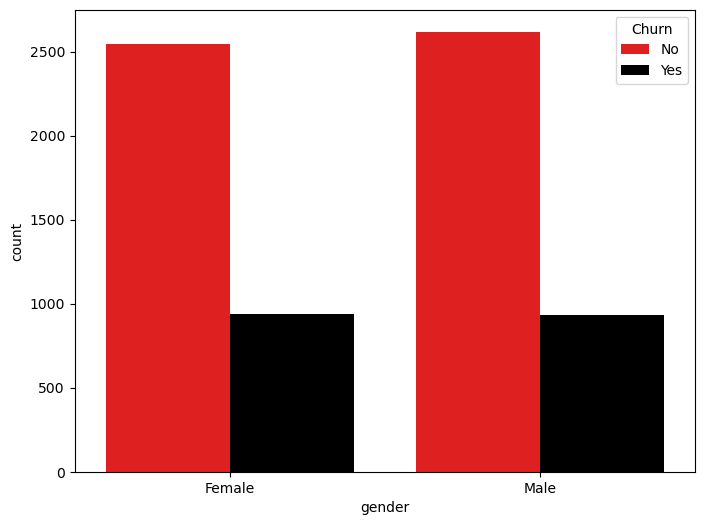

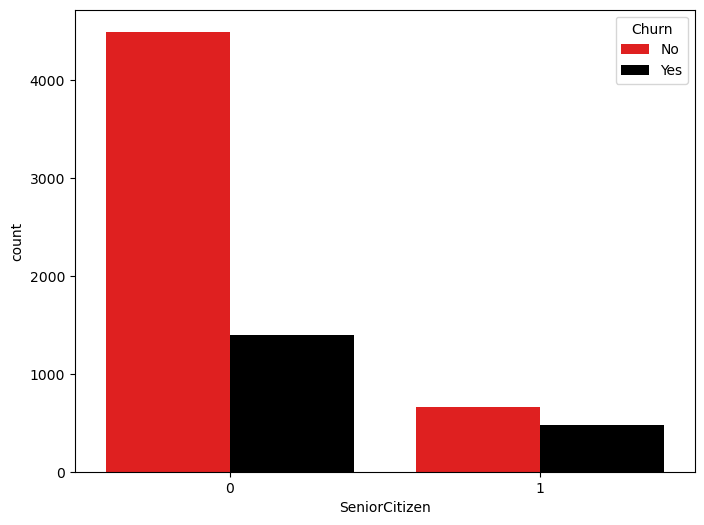

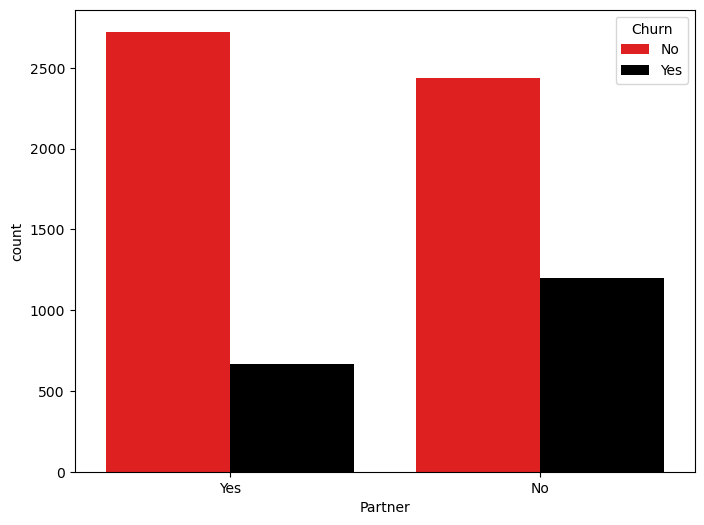

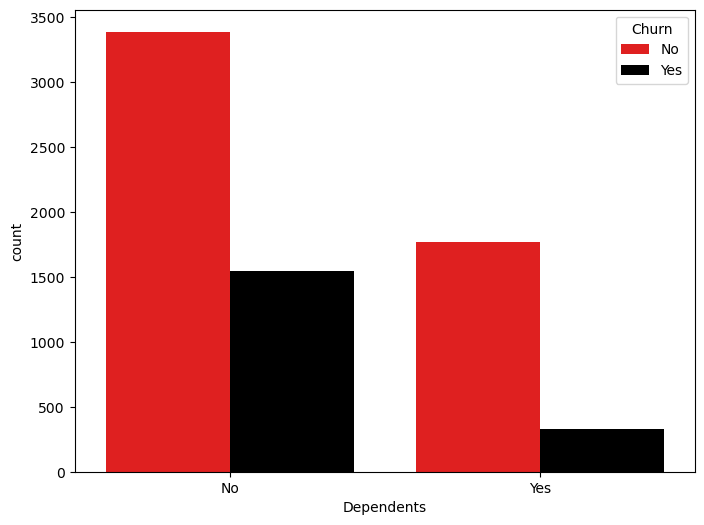

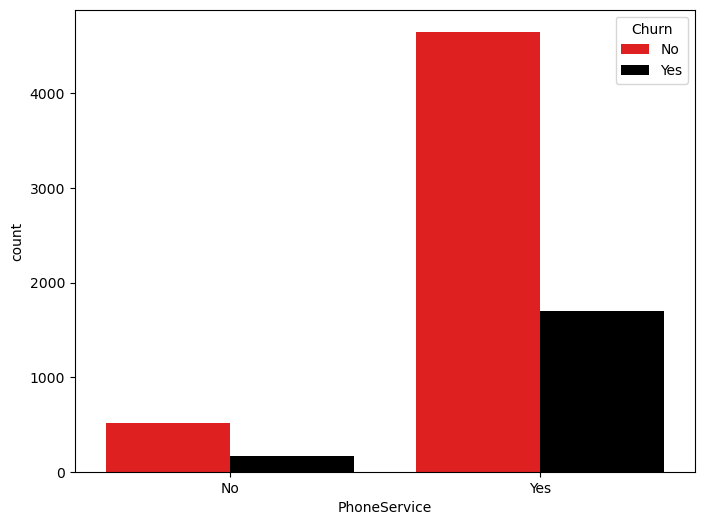

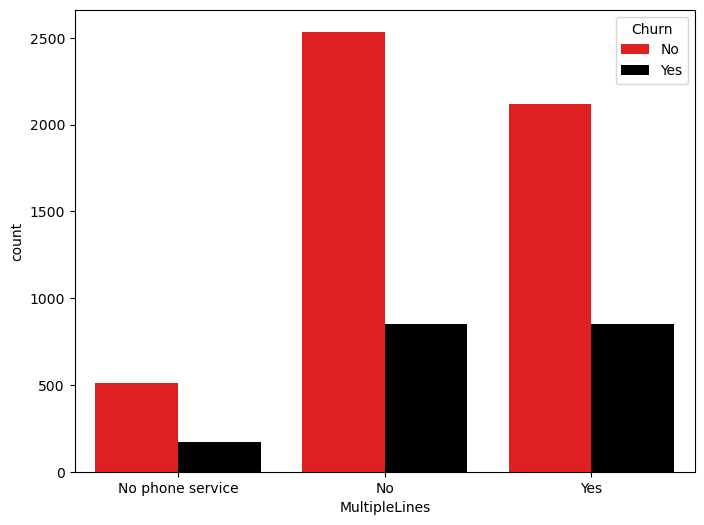

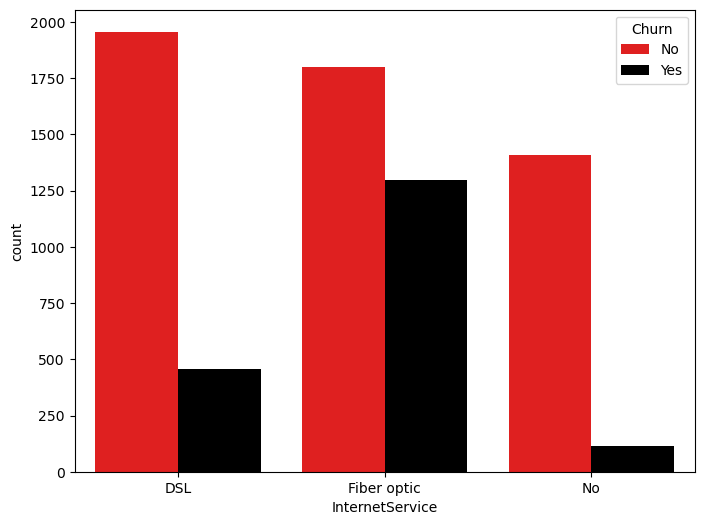

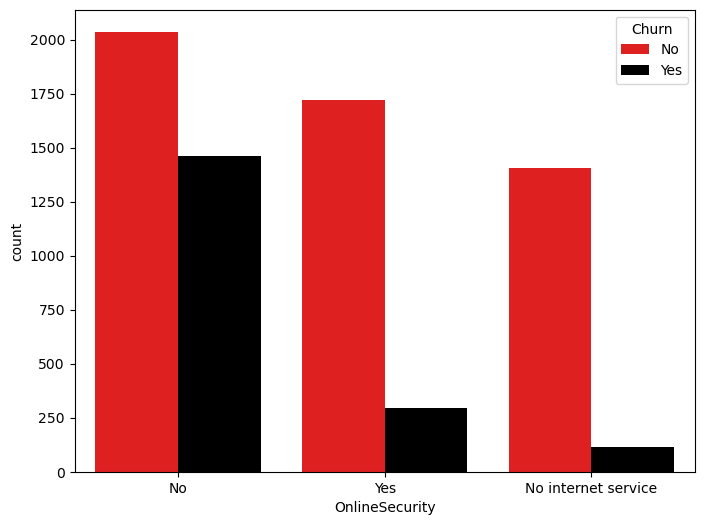

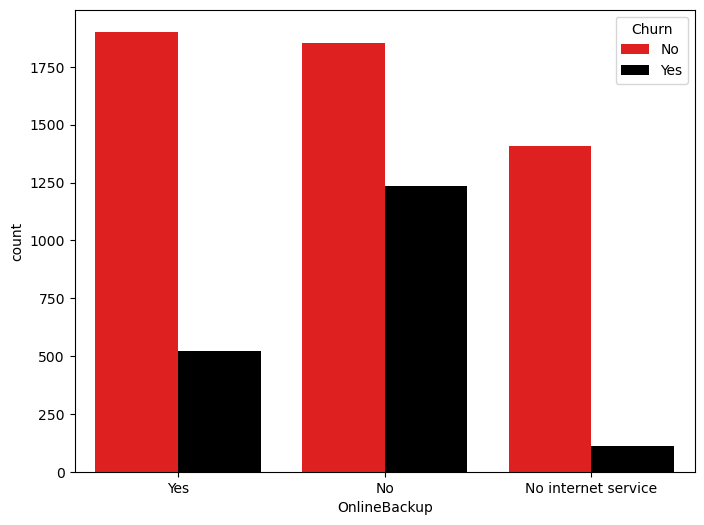

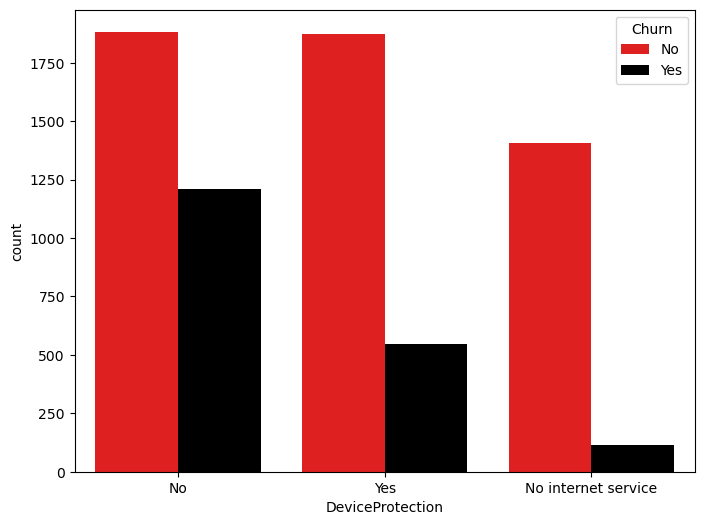

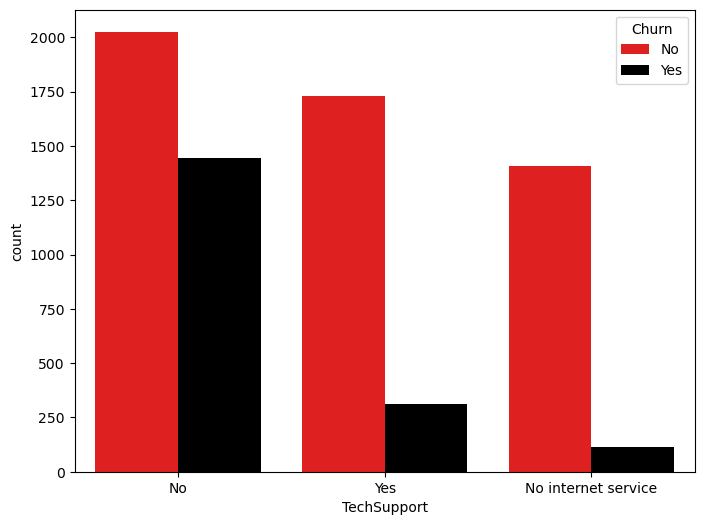

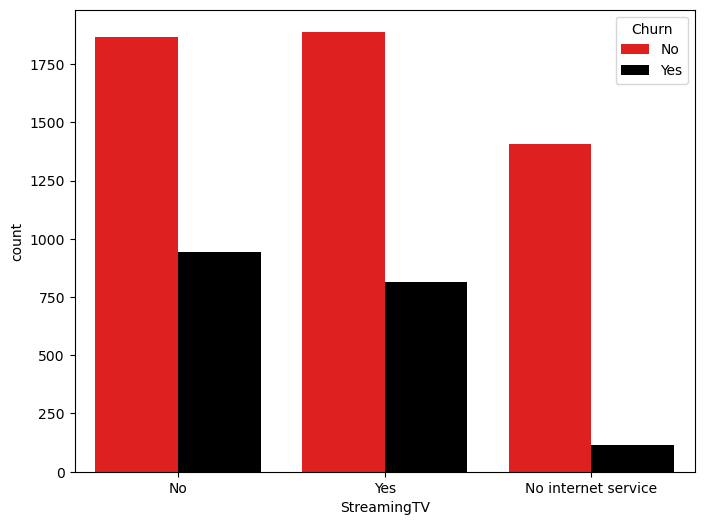

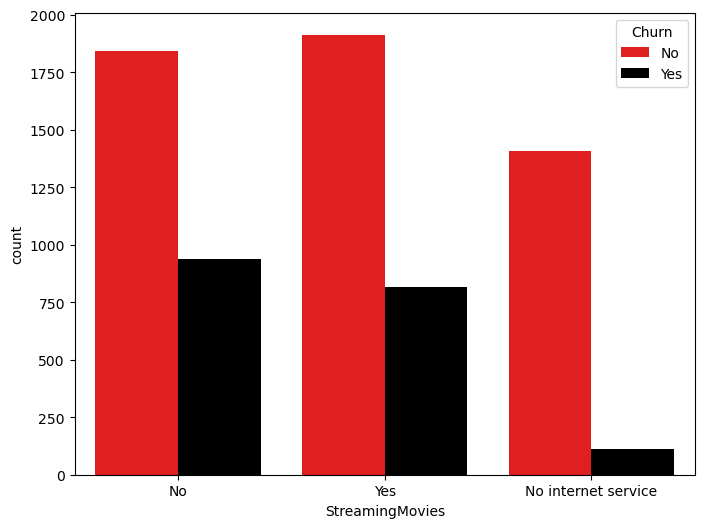

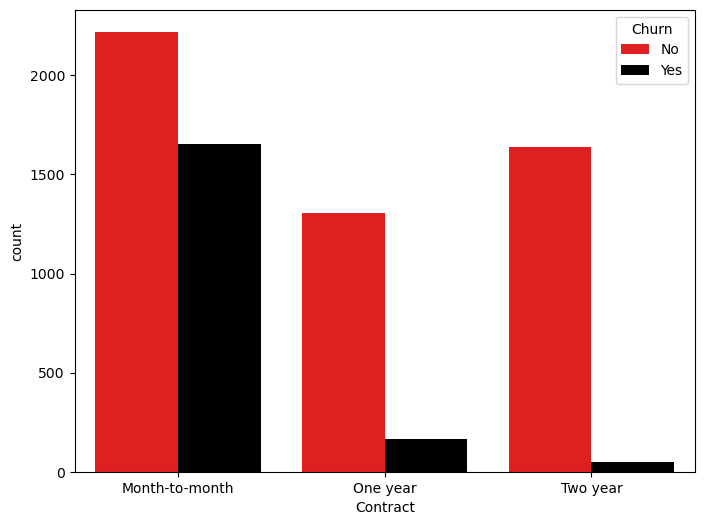

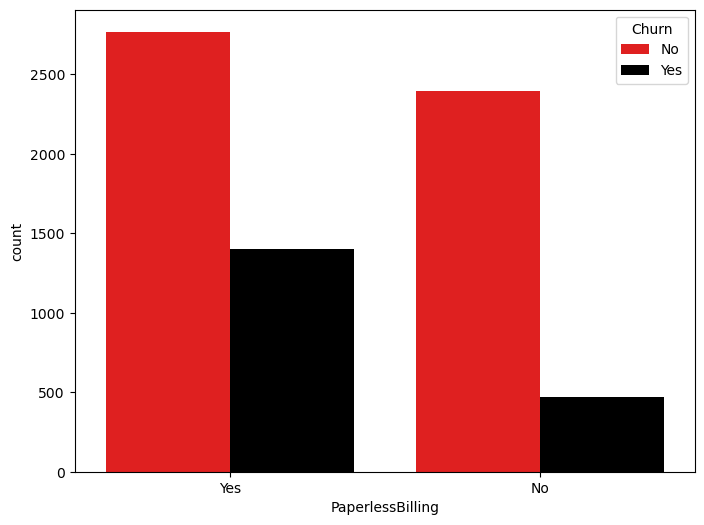

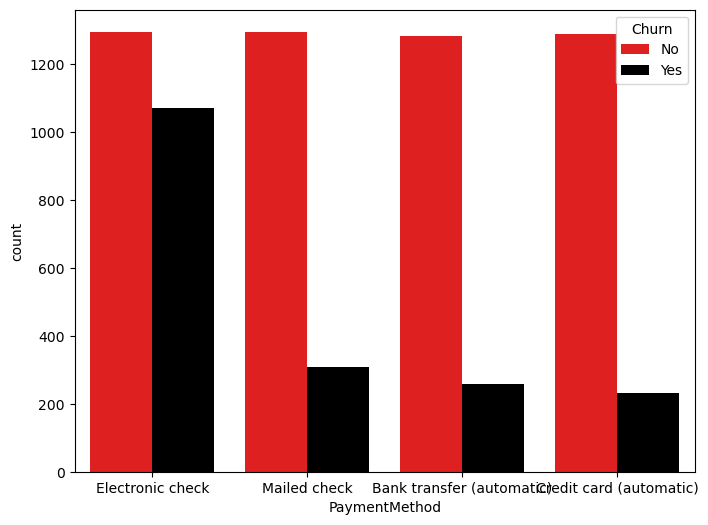

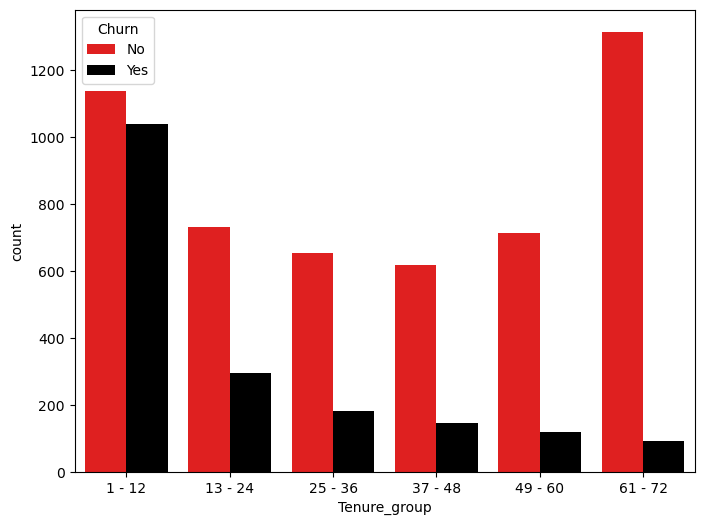

In [33]:
for i,predictor in enumerate(df.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    plt.figure(figsize=(8,6))
    sns.countplot(data = df, x = predictor, hue = 'Churn', palette =['red','black'])

### Take Away

1. More churn in 1-12 Tenure group.
2. Electronic check has more churn while comparing other payment method.

#### Seperating dataset into two sets, based on on churning

In [34]:
not_churned = df[df['Churn']== 'No']
churned = df[df['Churn']== 'Yes']

In [35]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'Tenure_group'],
      dtype='object')

In [36]:
churned['gender'].value_counts()

Female    939
Male      930
Name: gender, dtype: int64

 1. Ratio of male and female churned is almost same.

In [37]:
pd.crosstab(df.PaymentMethod,df.Churn)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


2. People who pay via Electronic check are more likly to churn.

In [38]:
df['Churn'] = np.where(df['Churn'] == 'Yes',1,0)

In [39]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


convert all the categorical variables into dummy variables

In [40]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_group_1 - 12,Tenure_group_13 - 24,Tenure_group_25 - 36,Tenure_group_37 - 48,Tenure_group_49 - 60,Tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [41]:
df_dummies.shape

(7032, 51)

In [42]:
df.shape

(7032, 20)

<b> Checking relation between Monthly Charges and Total Charges

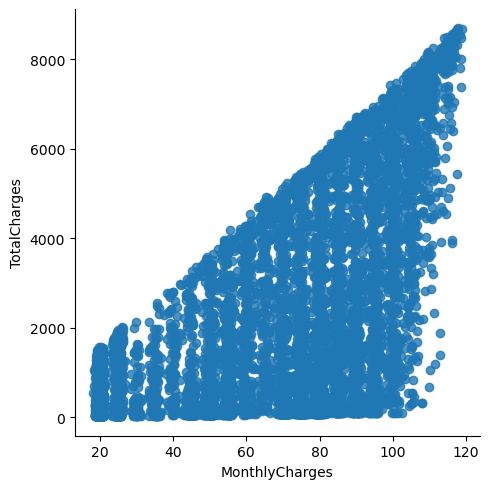

In [43]:
sns.lmplot(df,x ='MonthlyCharges', y='TotalCharges', fit_reg= False)

In [44]:
df_dummies['MonthlyCharges'].corr(df_dummies['TotalCharges'])

0.6510648032262024

Total charges increases as Monthly charges increases.

<b> Churn by Monthly Charges and Total Charges

Text(0.5, 1.0, 'Monthly Charges by Churn')

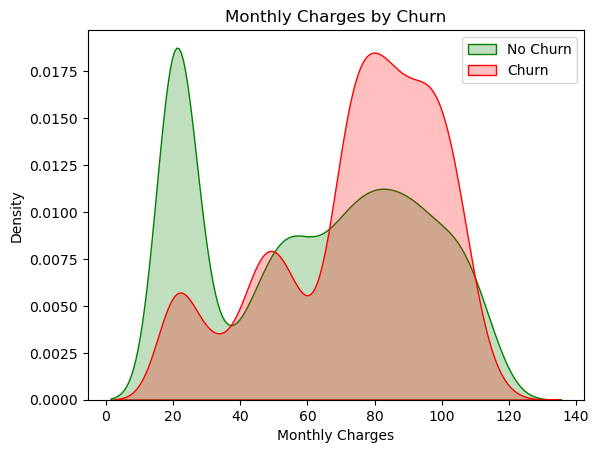

In [45]:
charges = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn'] == 0)], color ='green', fill = True)
charges = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn'] == 1)],ax = charges, color ='red', fill = True)
charges.legend(["No Churn","Churn"], loc = 'upper right')
charges.set_xlabel("Monthly Charges")
charges.set_ylabel('Density')
charges.set_title('Monthly Charges by Churn')


<b> High churn at higher Monthly charges

Text(0.5, 1.0, 'Total Charges by Churn')

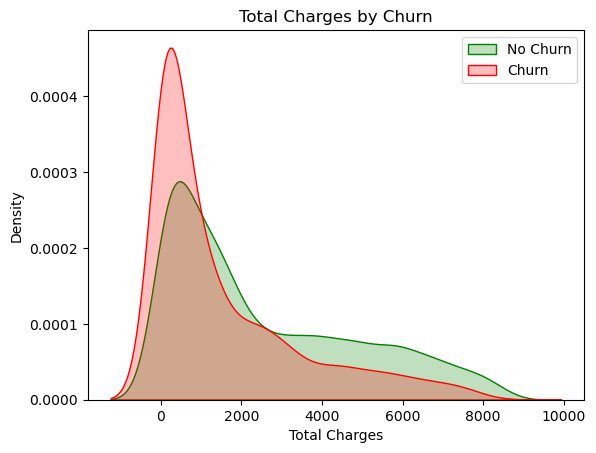

In [46]:
tcharges = sns.kdeplot(df_dummies.TotalCharges[(df_dummies['Churn'] == 0)], color ='green', fill = True)
tcharges = sns.kdeplot(df_dummies.TotalCharges[(df_dummies['Churn'] == 1)],ax = tcharges, color ='red', fill = True)
tcharges.legend(["No Churn","Churn"], loc = 'upper right')
tcharges.set_xlabel("Total Charges")
tcharges.set_ylabel('Density')
tcharges.set_title('Total Charges by Churn')

<b> High churn at lower Total charges

Text(0.5, 1.0, 'Tenure by Churn')

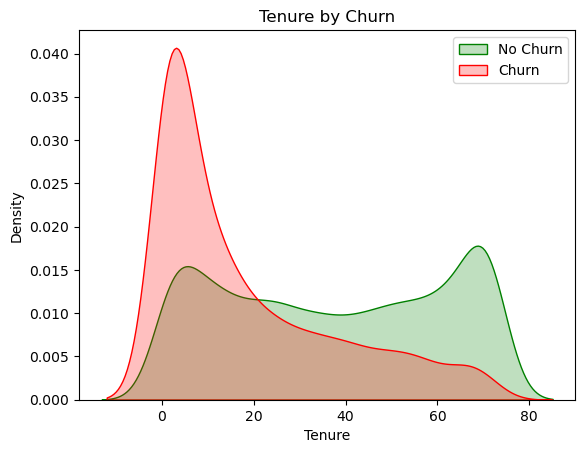

In [47]:
tenu = sns.kdeplot(data.tenure[(data['Churn'] == "No")], color ='green', fill = True)
tenu  = sns.kdeplot(data.tenure[(data['Churn'] == "Yes")],ax = tenu , color ='red', fill = True)
tenu .legend(["No Churn","Churn"], loc = 'upper right')
tenu .set_xlabel("Tenure")
tenu .set_ylabel('Density')
tenu .set_title('Tenure by Churn')

### Take Away

<b> Higher monthly charges, Lower tenure and Lower Total charges are the factors linked to high churn.

<function matplotlib.pyplot.show(close=None, block=None)>

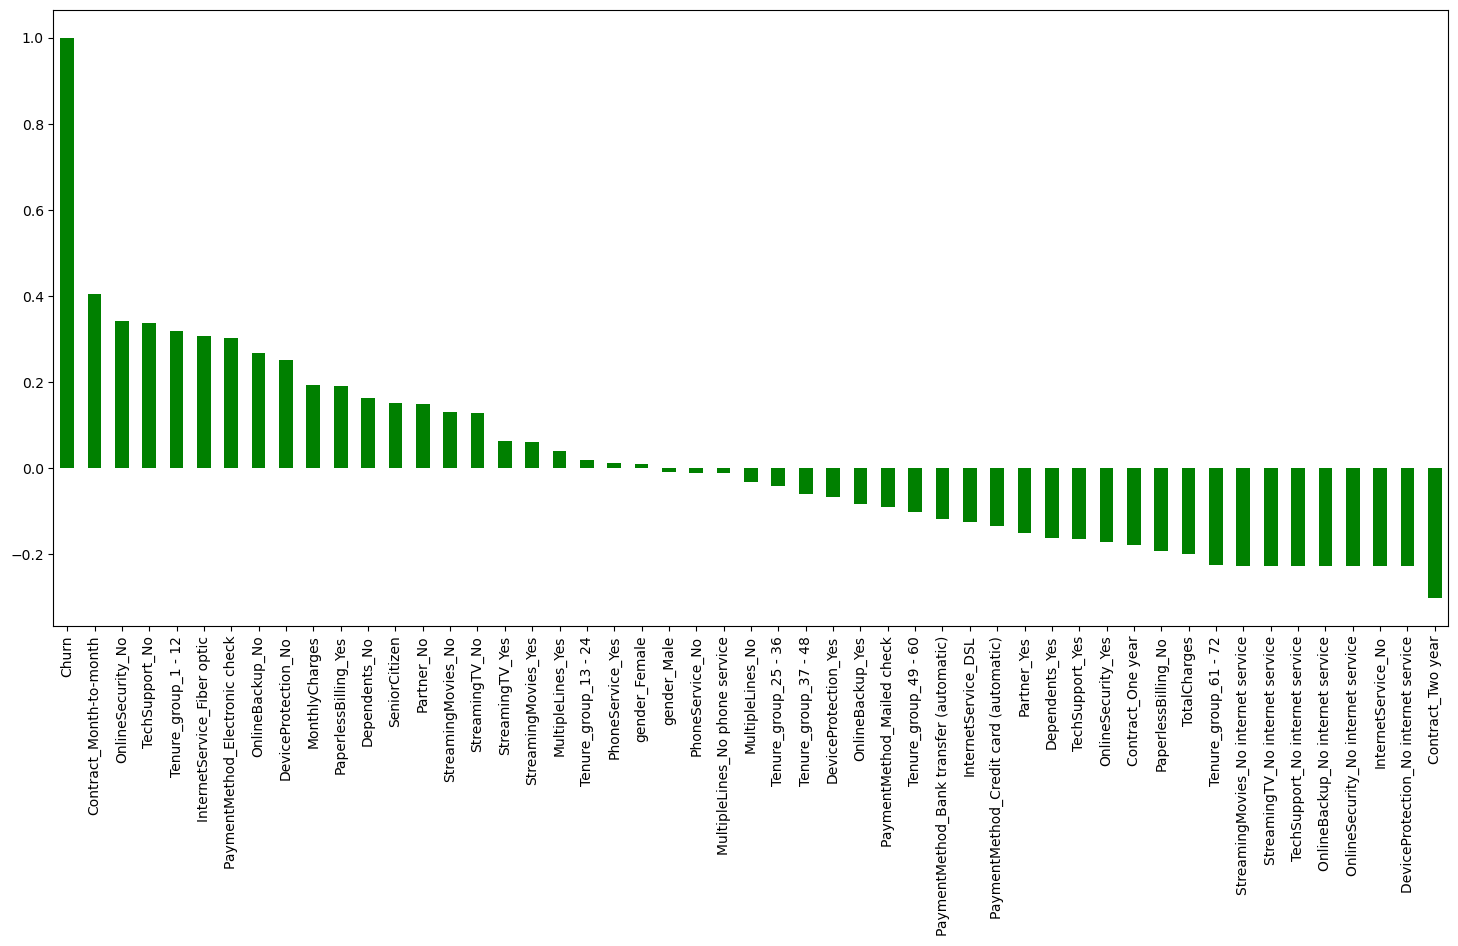

In [48]:
plt.figure(figsize=(18,8))
df_dummies.corr()['Churn'].sort_values(ascending= False).plot(kind='bar', color = 'green')
plt.show

In [49]:
df_dummies.columns

Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'P

## Take Away

1. From the above plot we can take a threshold point(0.2), 0.2 & above that point are the factors cause churning. So from the plot the factors are Contract_Month-to-month, OnlineSecurity_No, TechSupport_No, Tenure_group_1 - 12, InternetService_Fiber optic, PaymentMethod_Electronic check, OnlineBackup_No, DeviceProtection_No, MonthlyCharges and PaperlessBilling_Yes. 

2. Also factors which make less churn are Contract_Two year, DeviceProtection_No internet service,TechSupport_No internet service, StreamingMovies_No internet service, StreamingTV_No internet service,OnlineBackup_No internet service, OnlineSecurity_No internet service, InternetService_No and Tenure_group_61 - 72.

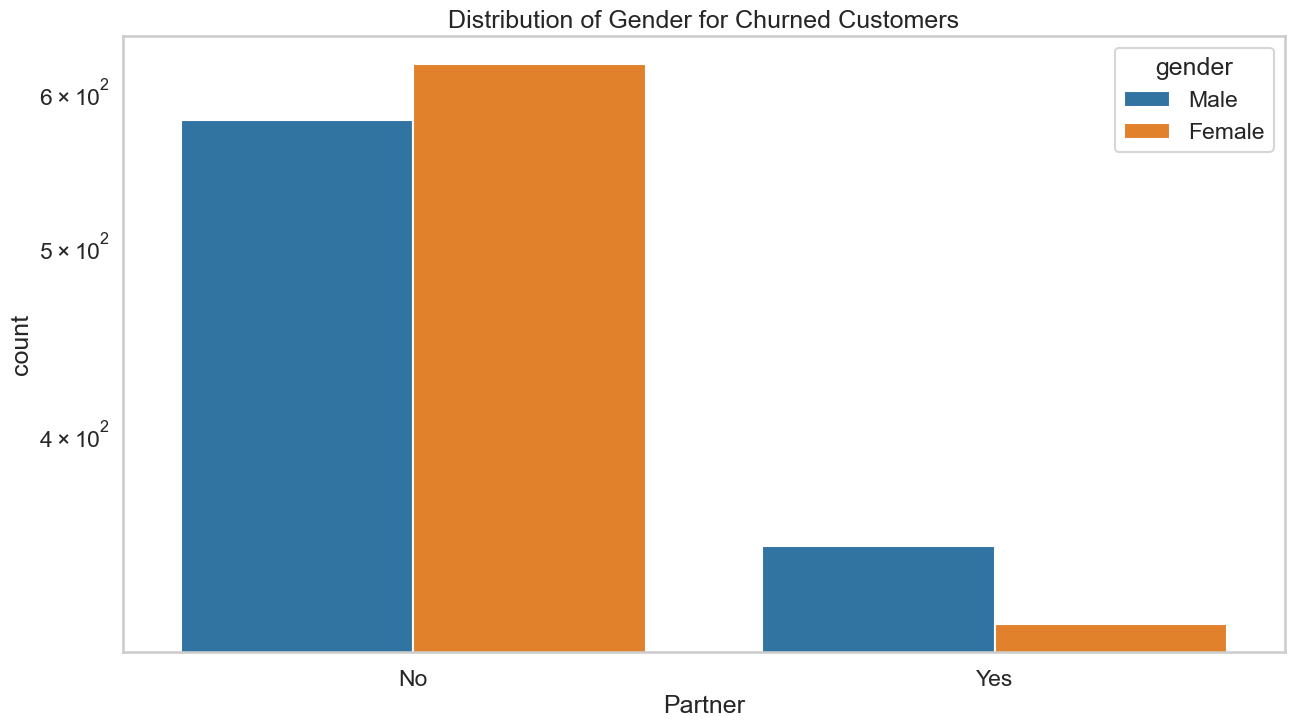

In [50]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.set_context('talk')
sns.countplot(data = churned, x = 'Partner', hue = 'gender')
plt.yscale('log')
plt.title('Distribution of Gender for Churned Customers')
plt.show()

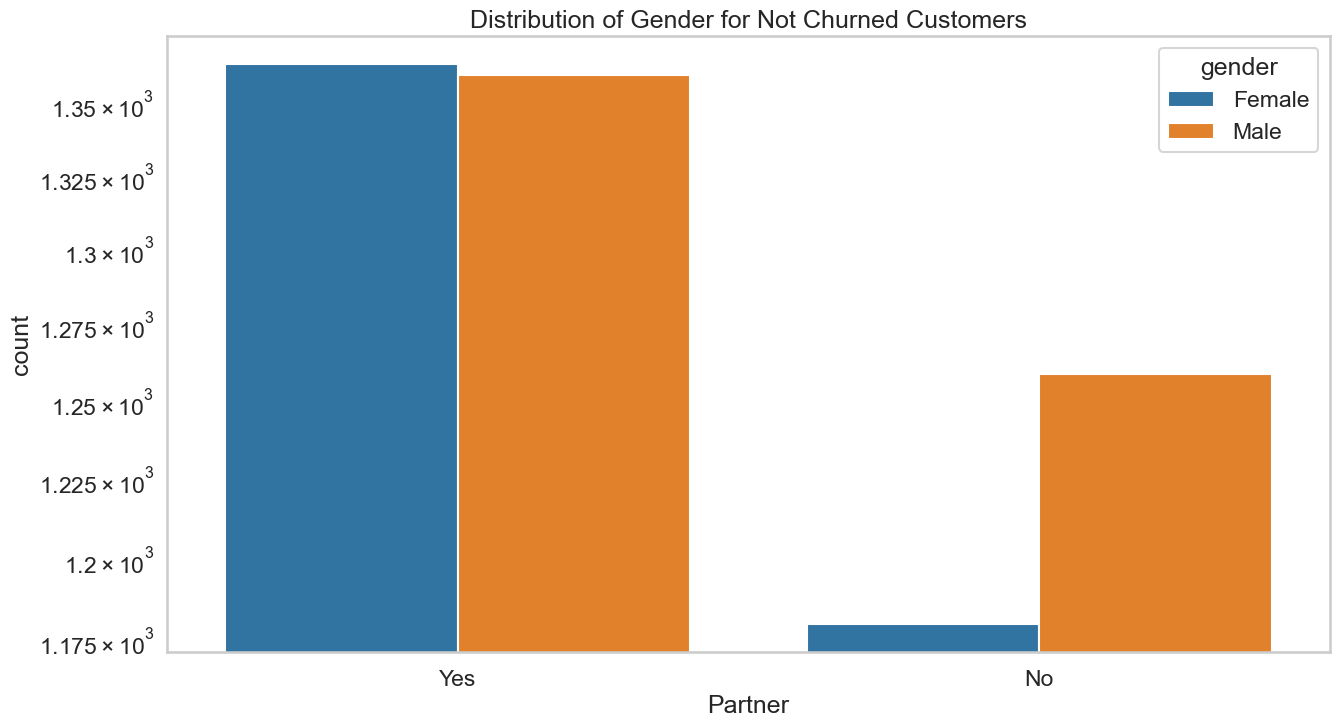

In [51]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.set_context('talk')
sns.countplot(data = not_churned, x = 'Partner', hue = 'gender')
plt.yscale('log')
plt.title('Distribution of Gender for Not Churned Customers')
plt.show()

<b> 1. Women with no partners are likely to churn and men with partner are likely to churn.<b>

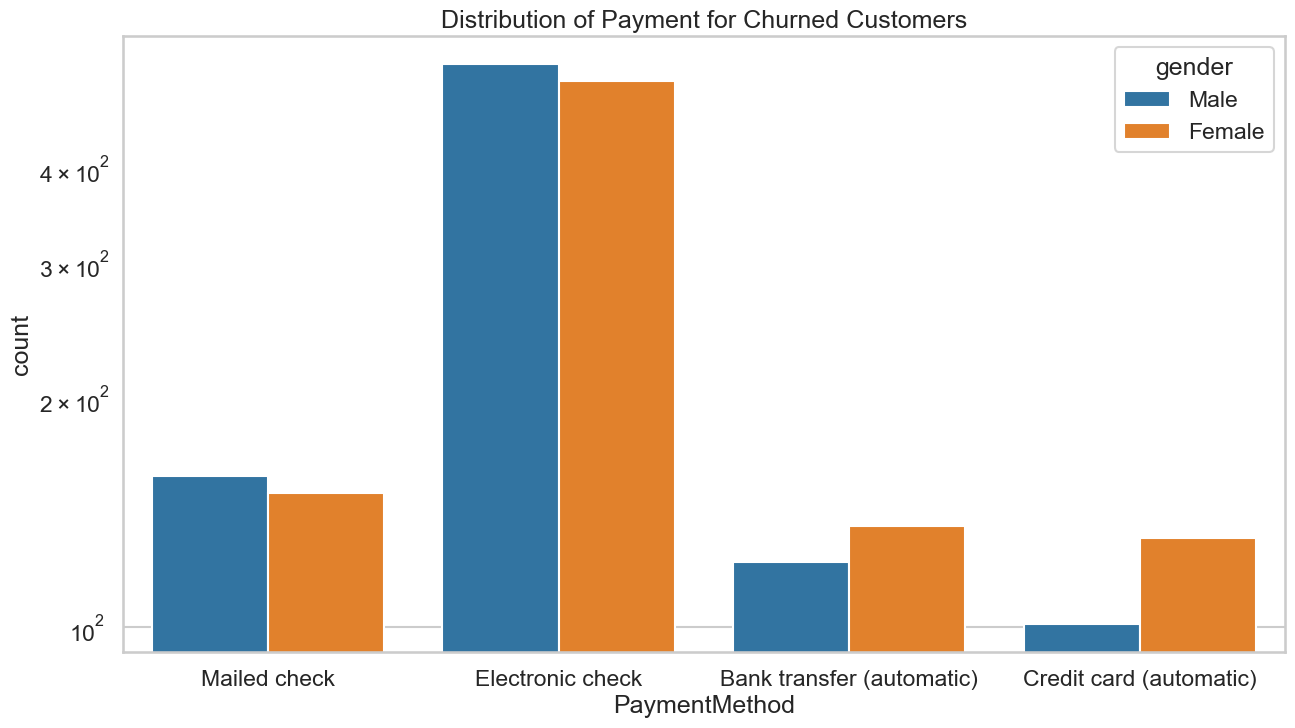

In [52]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.set_context('talk')
sns.countplot(data = churned, x = 'PaymentMethod', hue = 'gender')
plt.yscale('log')
plt.title('Distribution of Payment for Churned Customers')
plt.show()

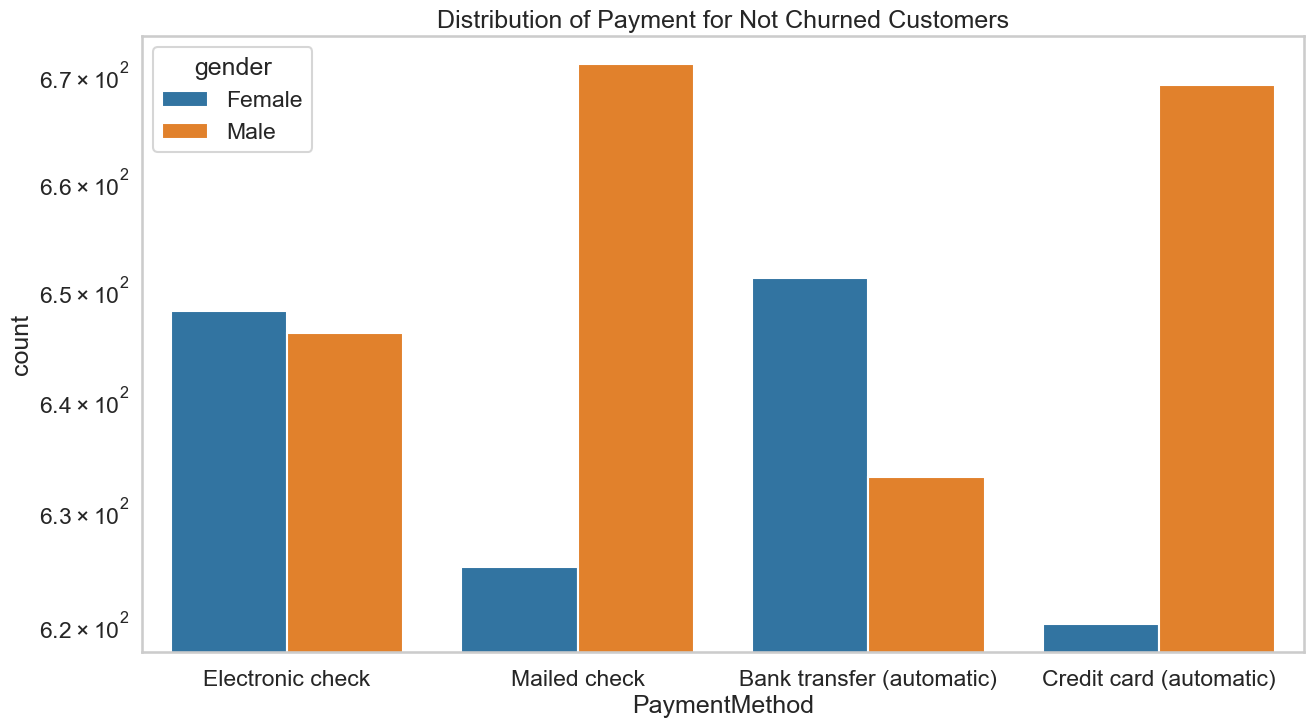

In [53]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.set_context('talk')
sns.countplot(data = not_churned, x = 'PaymentMethod', hue = 'gender')
plt.yscale('log')
plt.title('Distribution of Payment for Not Churned Customers')
plt.show()

<b>  Women with Credit card payment are likely to churn more than men and men using mailed check payment are likely to        churn more than women.<b>

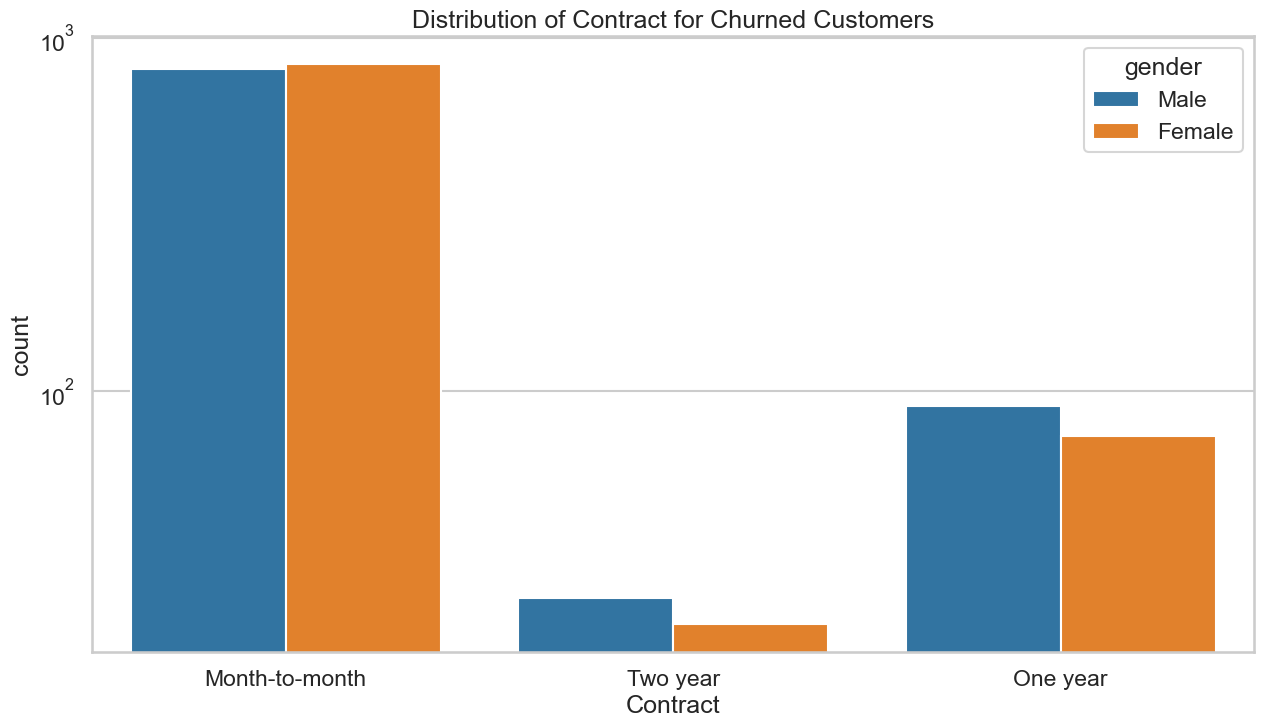

In [54]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.set_context('talk')
sns.countplot(data = churned, x = 'Contract', hue = 'gender')
plt.yscale('log')
plt.title('Distribution of Contract for Churned Customers')
plt.show()

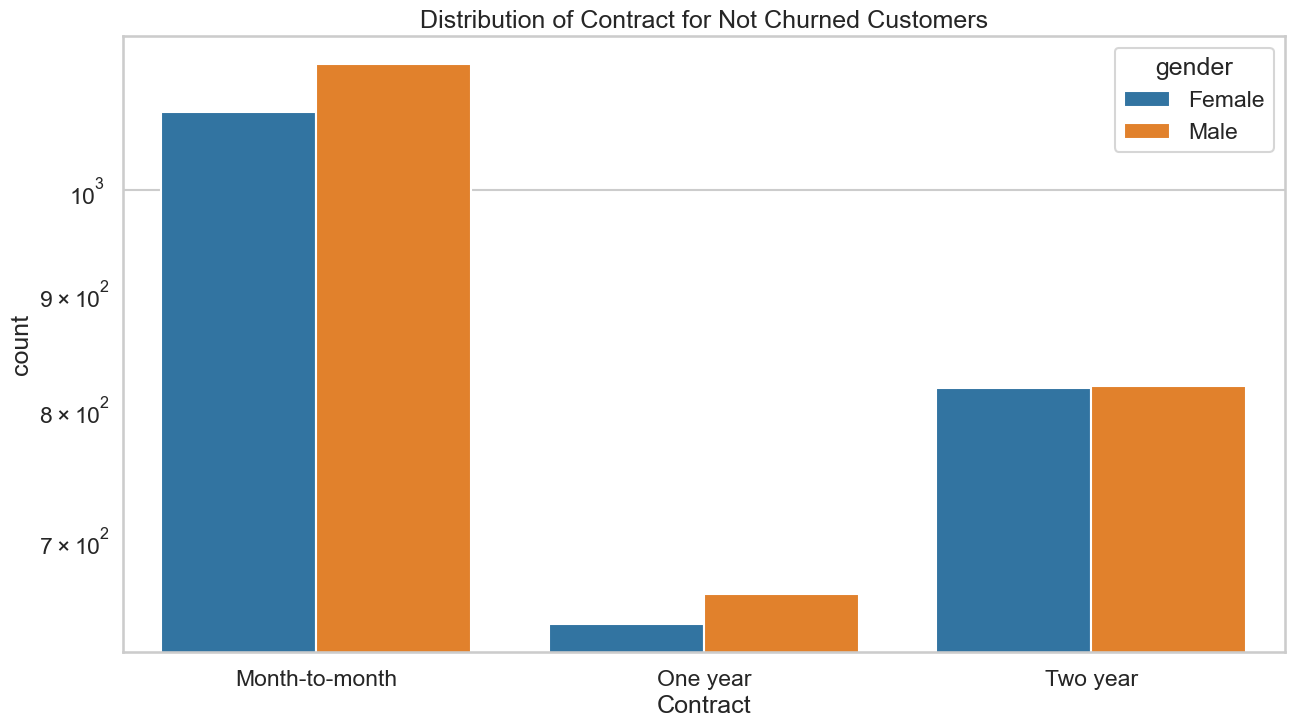

In [55]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.set_context('talk')
sns.countplot(data = not_churned, x = 'Contract', hue = 'gender')
plt.yscale('log')
plt.title('Distribution of Contract for Not Churned Customers')
plt.show()

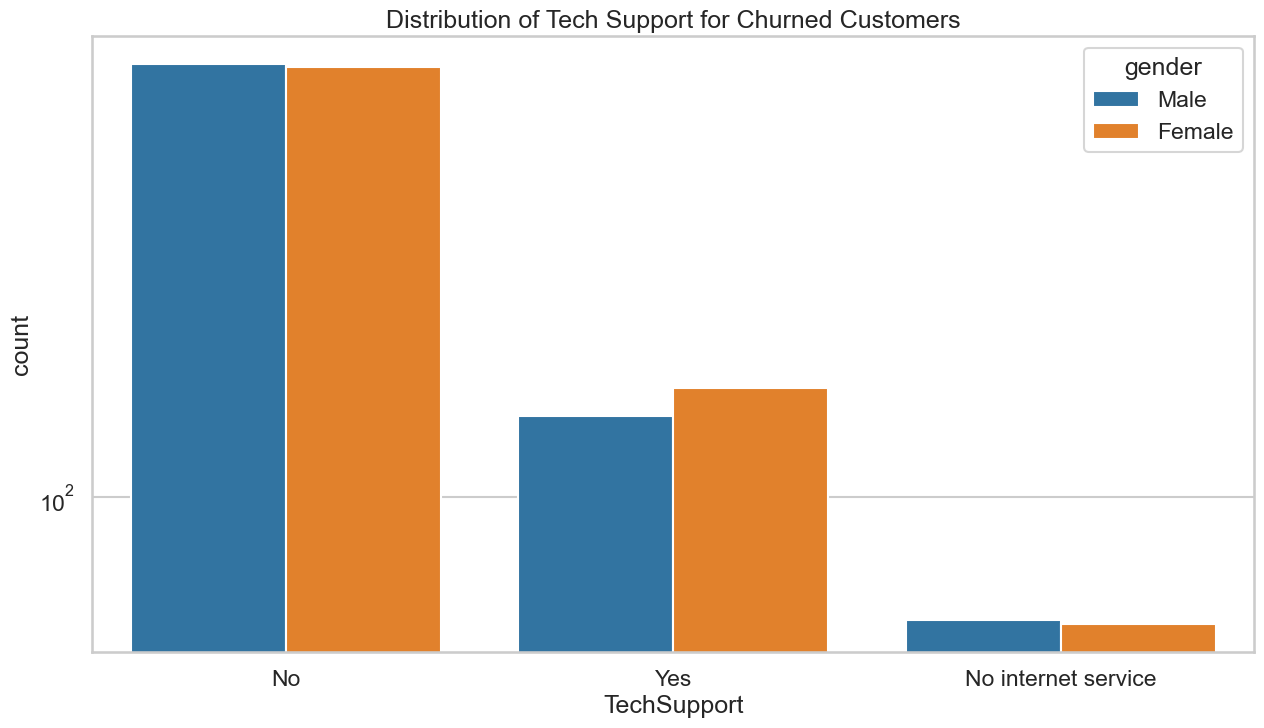

In [56]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.set_context('talk')
sns.countplot(data = churned, x = 'TechSupport', hue = 'gender')
plt.yscale('log')
plt.title('Distribution of Tech Support for Churned Customers')
plt.show()

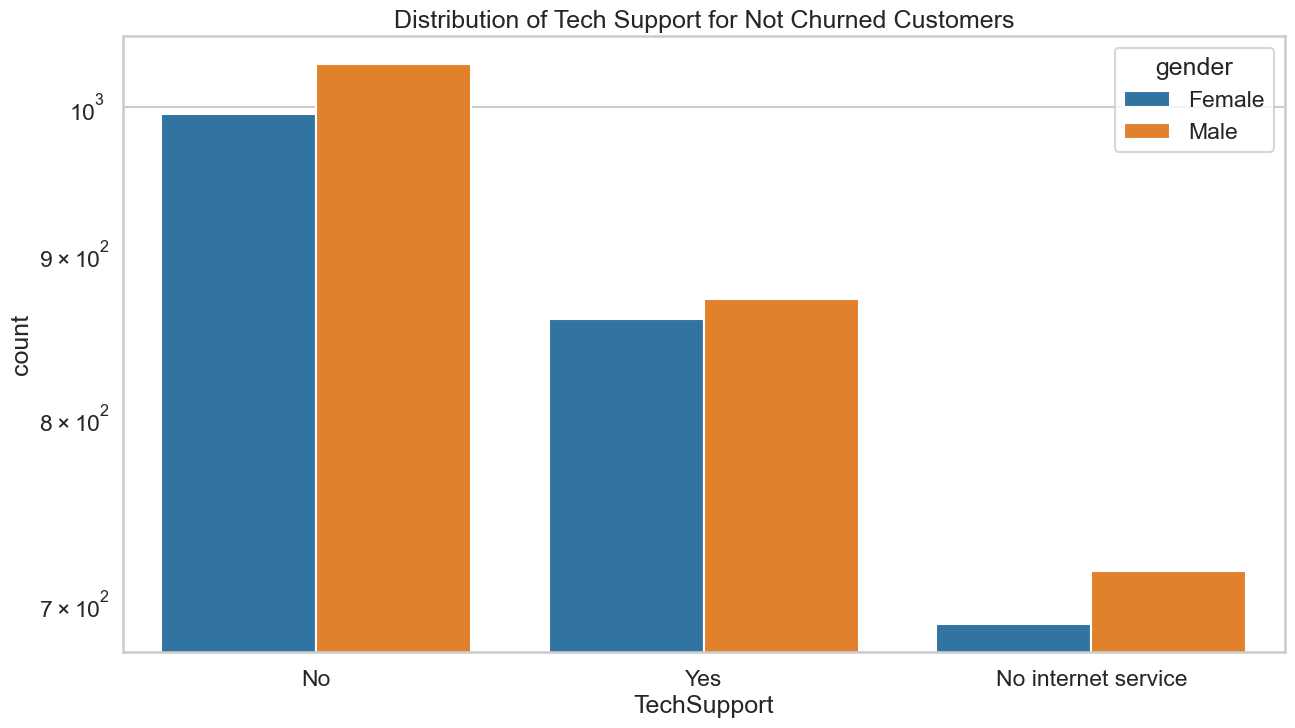

In [57]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.set_context('talk')
sns.countplot(data = not_churned, x = 'TechSupport', hue = 'gender')
plt.yscale('log')
plt.title('Distribution of Tech Support for Not Churned Customers')
plt.show()

In [58]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

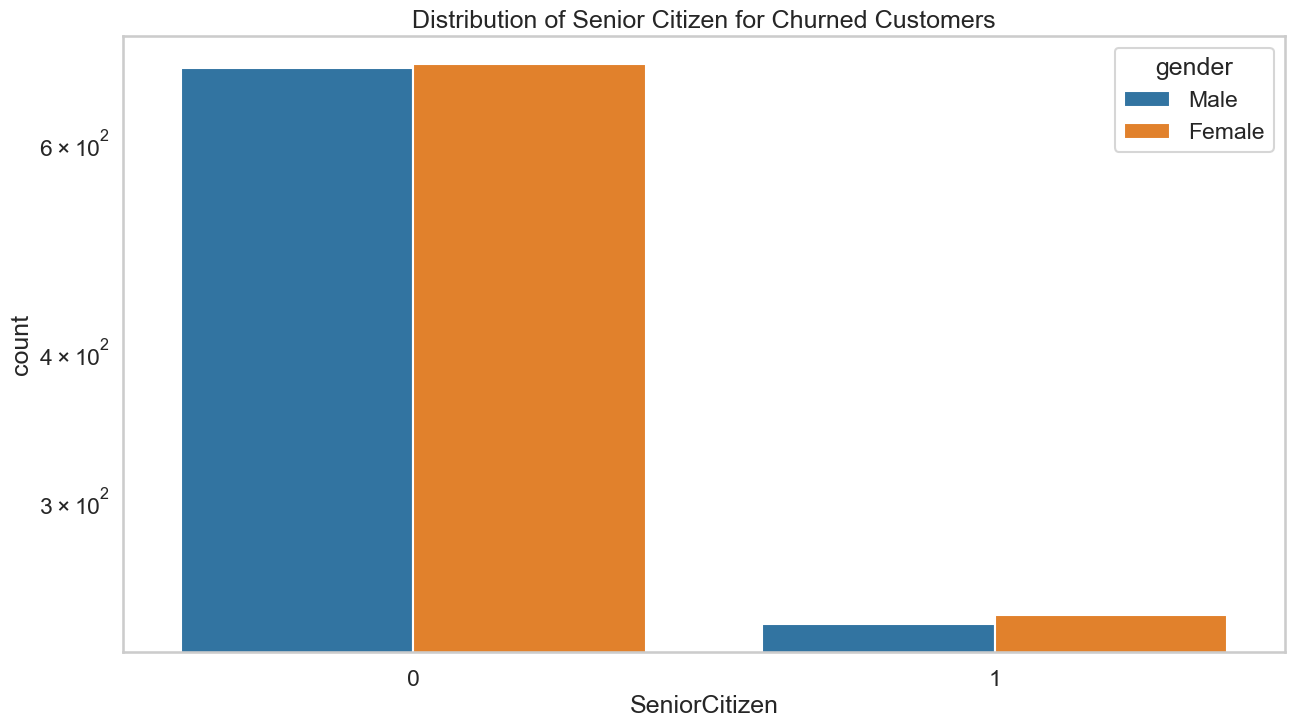

In [59]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.set_context('talk')
sns.countplot(data = churned, x = 'SeniorCitizen', hue = 'gender')
plt.yscale('log')
plt.title('Distribution of Senior Citizen for Churned Customers')
plt.show()

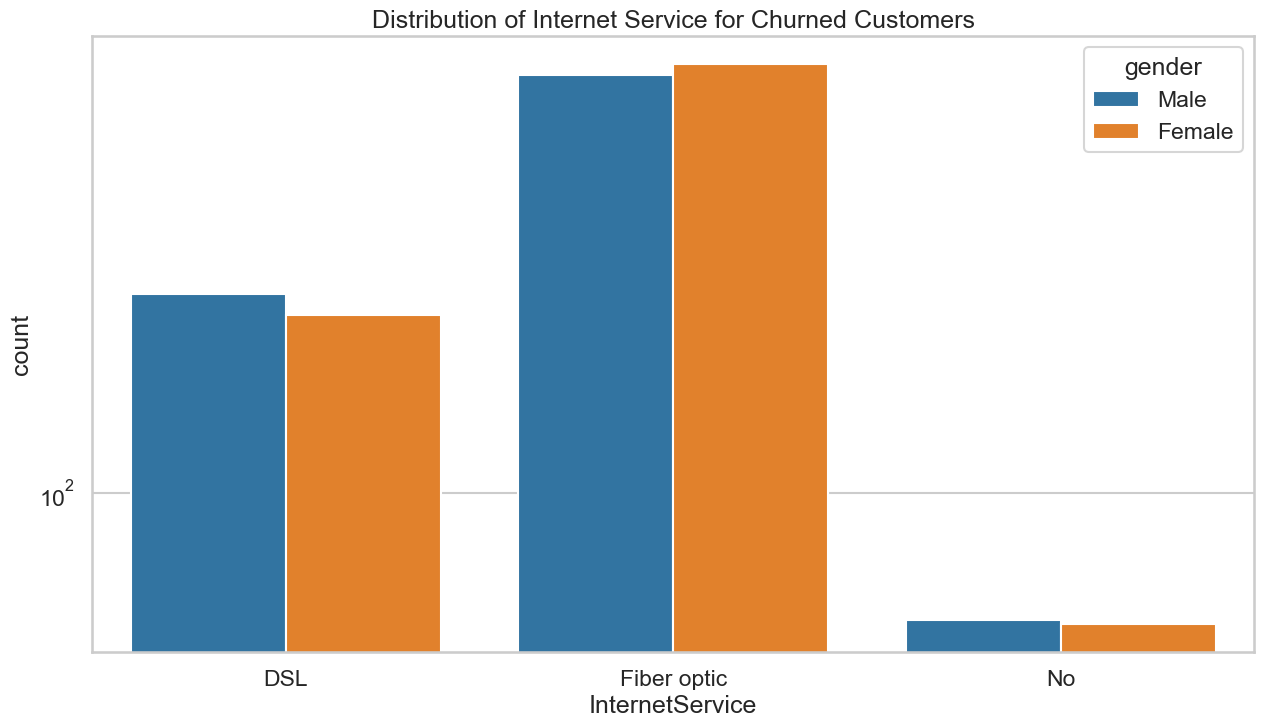

In [60]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.set_context('talk')
sns.countplot(data = churned, x = 'InternetService', hue = 'gender')
plt.yscale('log')
plt.title('Distribution of Internet Service for Churned Customers')
plt.show()

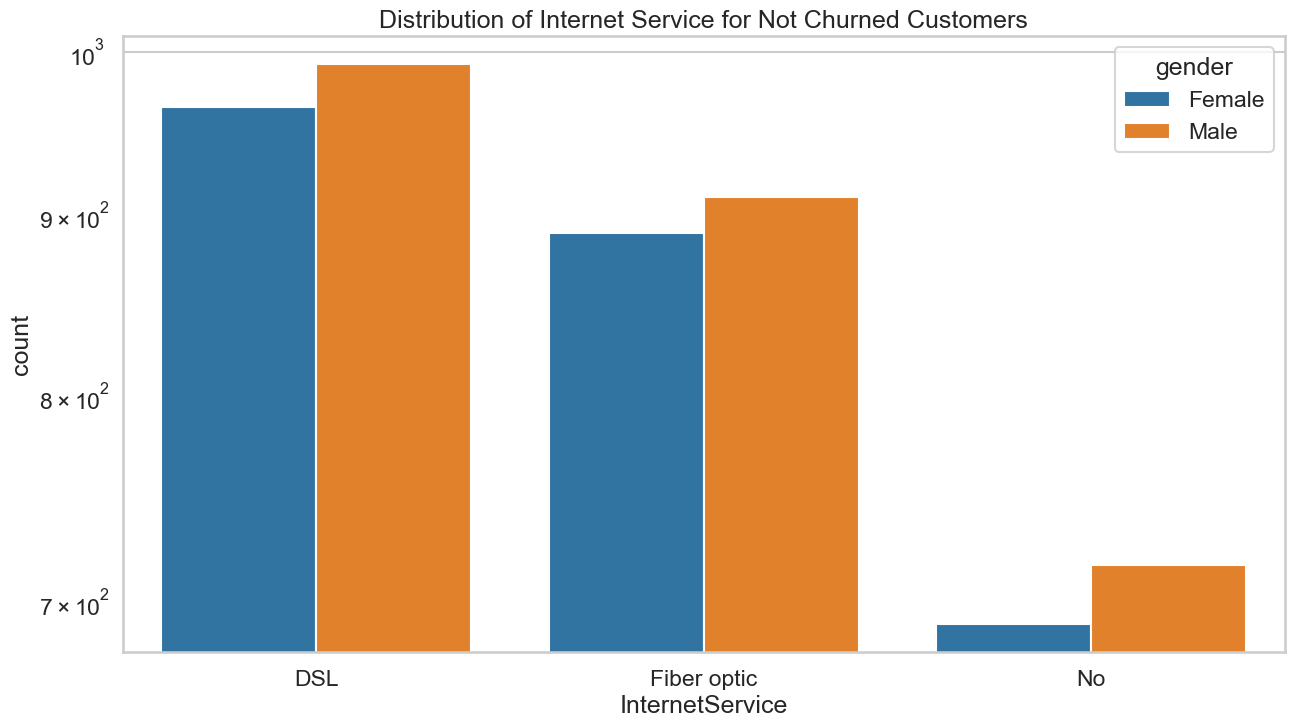

In [61]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.set_context('talk')
sns.countplot(data = not_churned, x = 'InternetService', hue = 'gender')
plt.yscale('log')
plt.title('Distribution of Internet Service for Not Churned Customers')
plt.show()

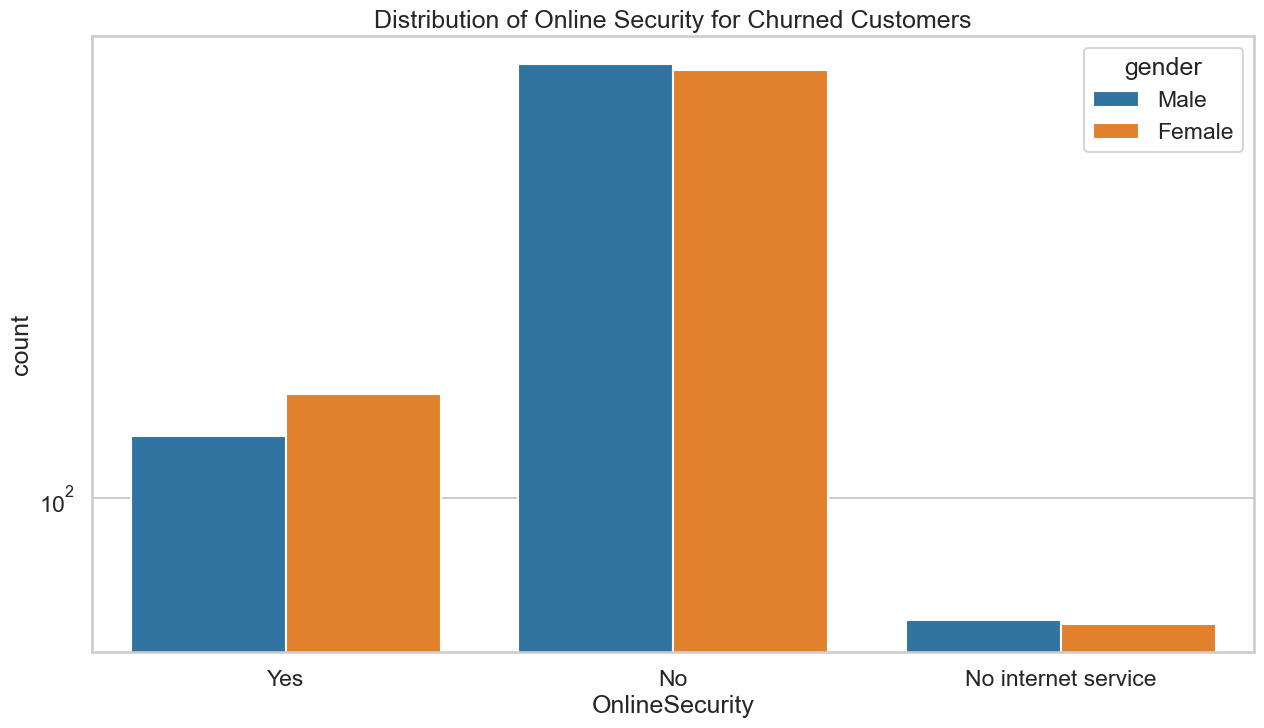

In [62]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.set_context('talk')
sns.countplot(data = churned, x = 'OnlineSecurity', hue = 'gender')
plt.yscale('log')
plt.title('Distribution of Online Security for Churned Customers')
plt.show()

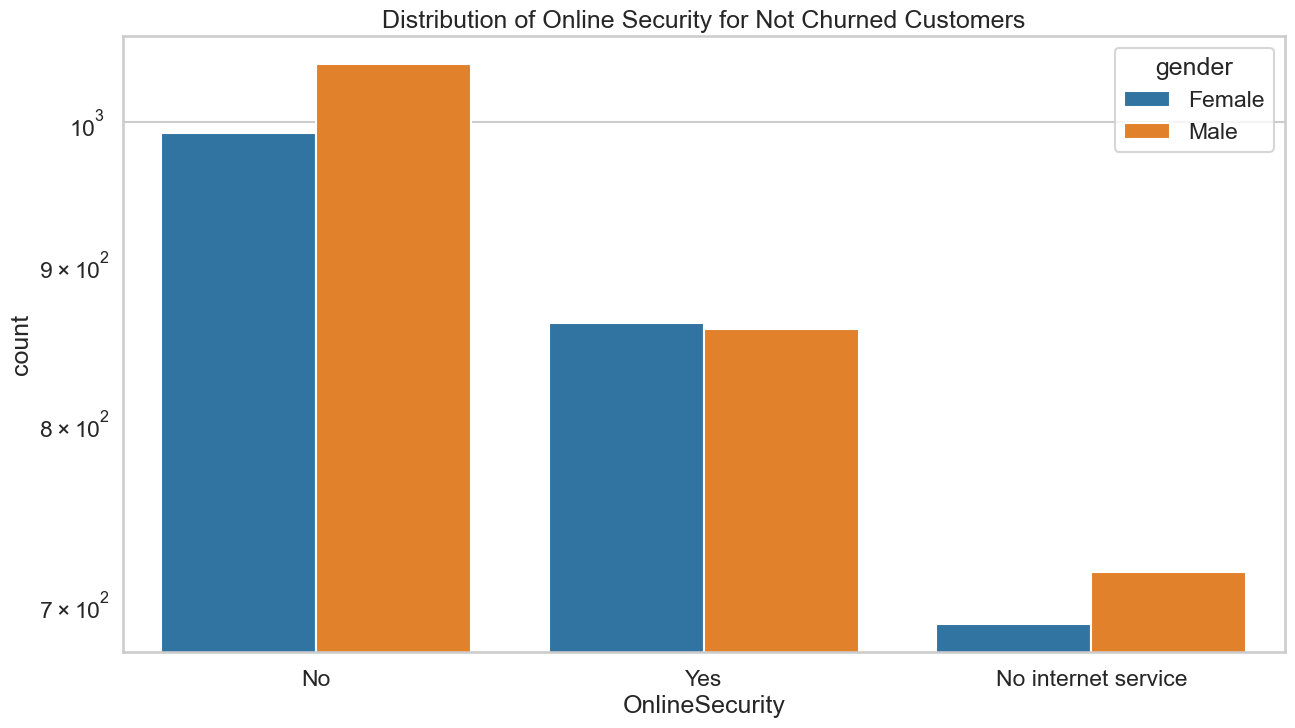

In [63]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.set_context('talk')
sns.countplot(data = not_churned, x = 'OnlineSecurity', hue = 'gender')
plt.yscale('log')
plt.title('Distribution of Online Security for Not Churned Customers')
plt.show()

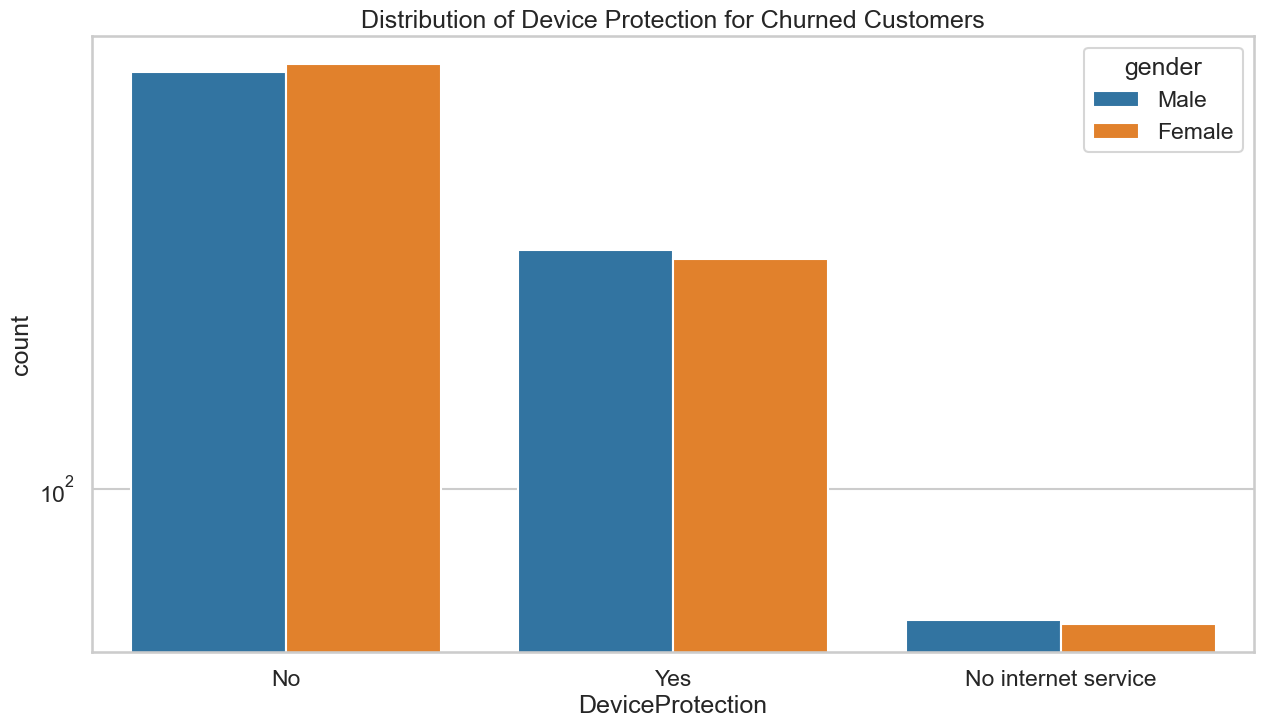

In [64]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.set_context('talk')
sns.countplot(data = churned, x = 'DeviceProtection', hue = 'gender')
plt.yscale('log')
plt.title('Distribution of Device Protection for Churned Customers')
plt.show()

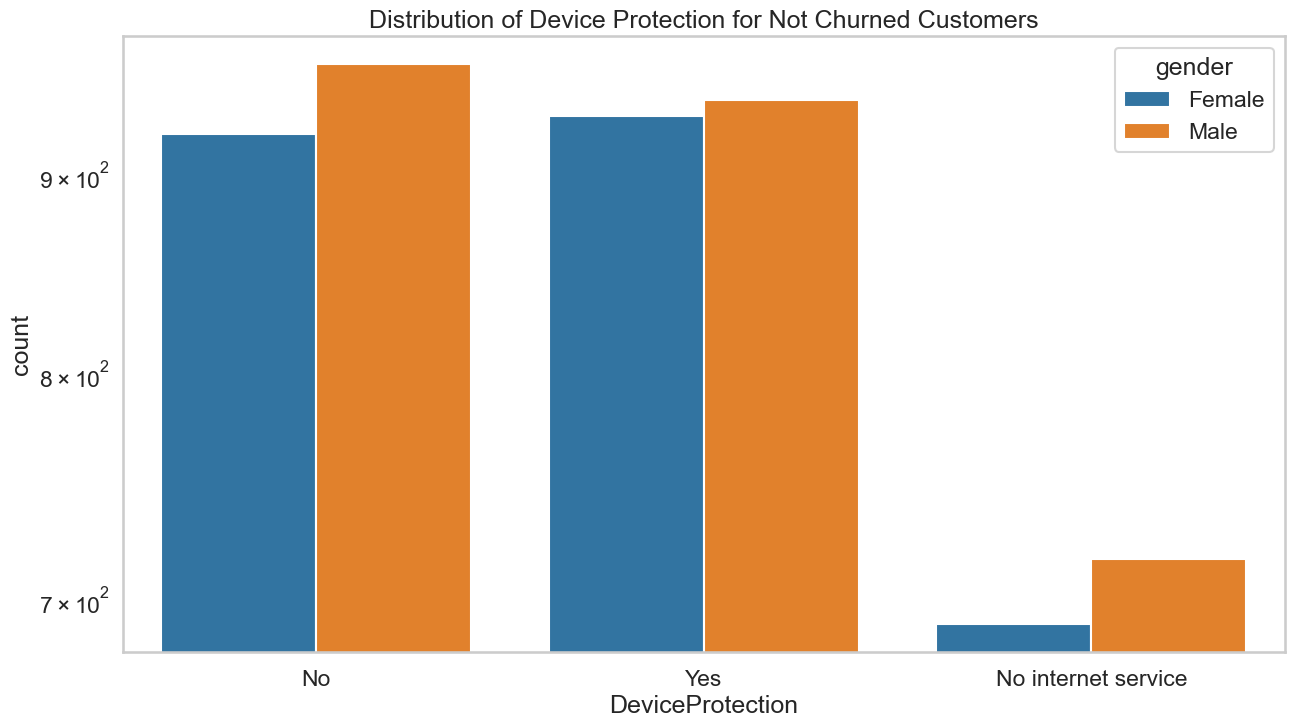

In [65]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.set_context('talk')
sns.countplot(data = not_churned, x = 'DeviceProtection', hue = 'gender')
plt.yscale('log')
plt.title('Distribution of Device Protection for Not Churned Customers')
plt.show()

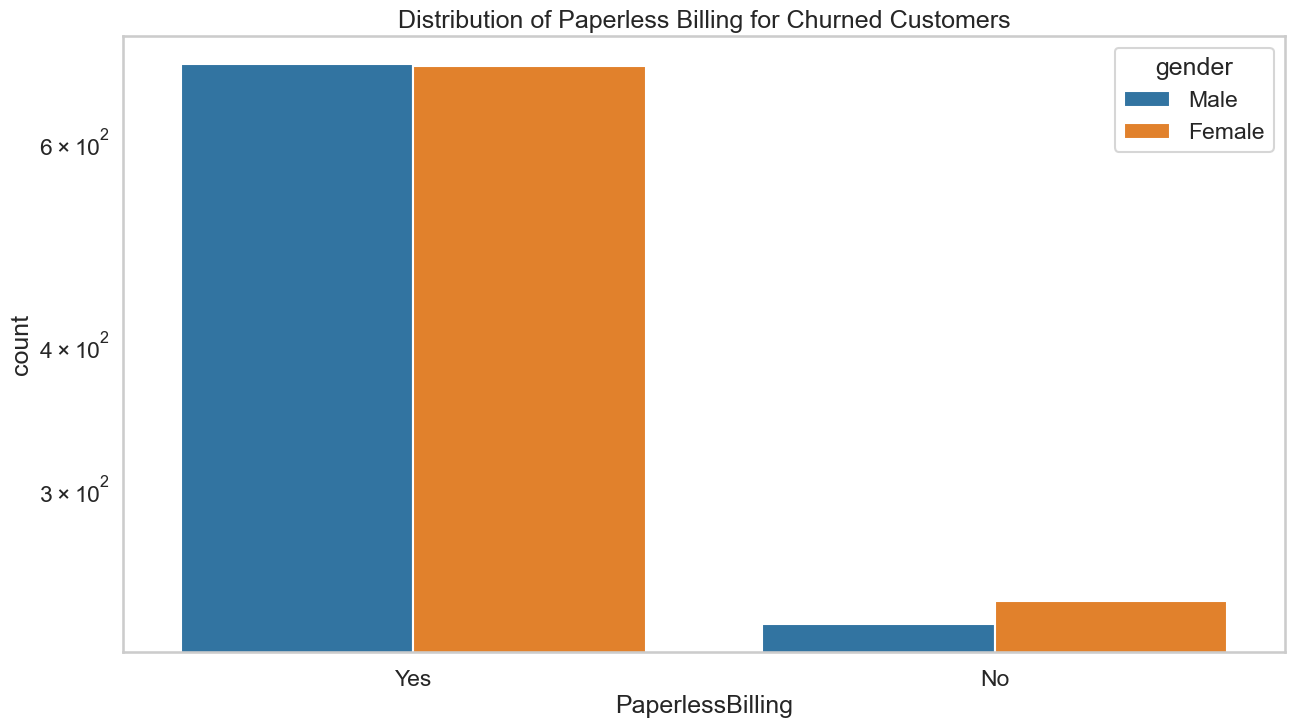

In [66]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.set_context('talk')
sns.countplot(data = churned, x = 'PaperlessBilling', hue = 'gender')
plt.yscale('log')
plt.title('Distribution of Paperless Billing for Churned Customers')
plt.show()

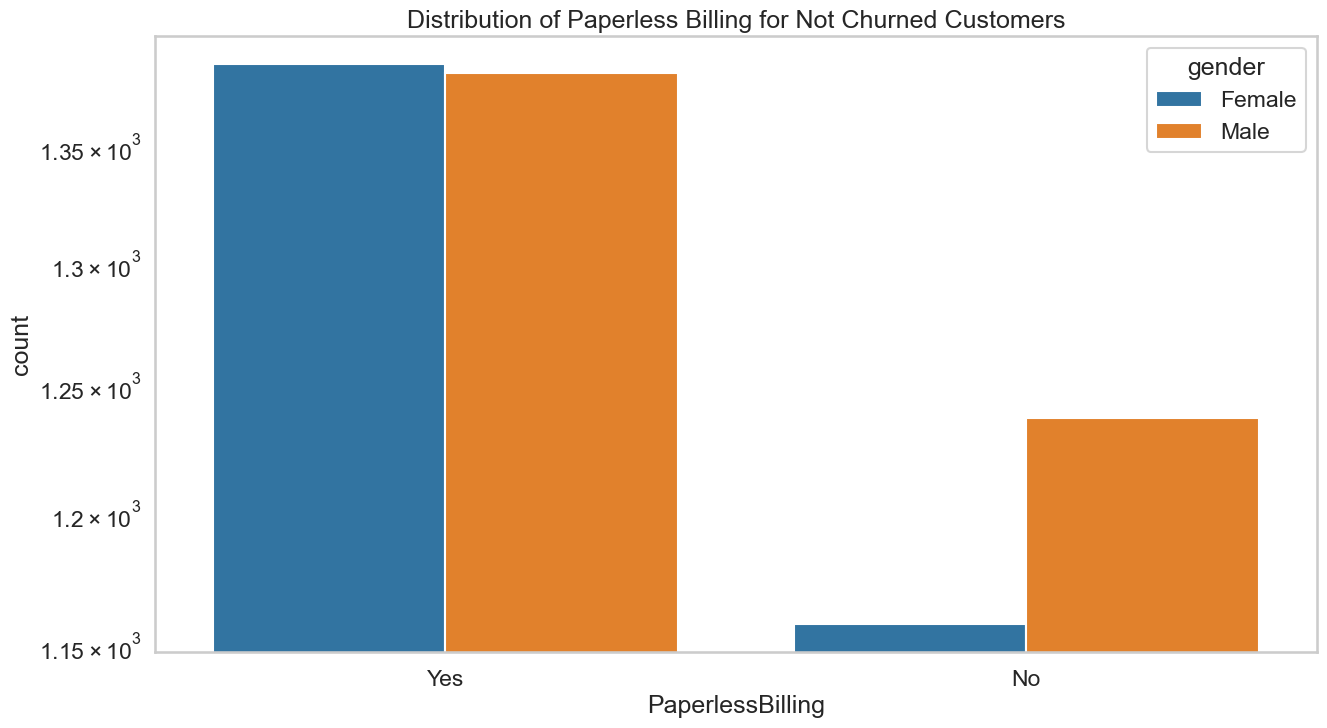

In [67]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.set_context('talk')
sns.countplot(data = not_churned, x = 'PaperlessBilling', hue = 'gender')
plt.yscale('log')
plt.title('Distribution of Paperless Billing for Not Churned Customers')
plt.show()

## Conclusion

#### 1. Electronic check payment medium are the highest chuners.
#### 2. In contract trems, monthly customers are more likely to churn.
#### 3. Non Senior citizens are high chuners.
#### 4. Paperless billing customers are high churners.
#### 5. No Online security, No Tech Support, No device protection are high churners.
#### 6. Internet service with Fiber optic customers are highest chuners.